# **Breast cancer detection**
*Prepared by Mr. Hemant Gautam & Mr. Jane Alam* 

**Pycaret**

Project- Analysing Breast Cancer using Pycaret to make predictions.

**Introduction**

The aim of this project is to to understand the process of organizing and preparing the data, selecting the features, choosing and applying the Pycaret tool, comparing, selecting and improving the best models.

The features from the data set describe characteristics of the cell nuclei and are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. As described in UCI Machine Learning Repository, the attribute informations are:

**Attribute Information:**

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)


**Introduction to PyCaret** - An open source low-code ML library



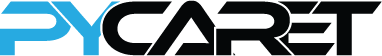

You can reach pycaret website and documentation from https://pycaret.org

PyCaret is an open source, low-code machine learning library in Python that allows you to go from preparing your data to deploying your model within seconds in your choice of notebook environment.

PyCaret being a low-code library makes you more productive. With less time spent coding, you and your team can now focus on business problems.

PyCaret is simple and easy to use machine learning library that will help you to perform end-to-end ML experiments with less lines of code.

PyCaret is a business ready solution. It allows you to do prototyping quickly and efficiently from your choice of notebook environment.

**Installing Pycaret library**

In [ ]:
pip install pycaret


     |████████████████████████████████| 194kB 4.8MB/s 
     |████████████████████████████████| 1.6MB 15.6MB/s 
     |████████████████████████████████| 133kB 37.0MB/s 
     |████████████████████████████████| 1.2MB 33.2MB/s 
     |████████████████████████████████| 63.9MB 72kB/s 
     |████████████████████████████████| 61kB 8.0MB/s 
     |████████████████████████████████| 389kB 38.0MB/s 
     |████████████████████████████████| 81kB 9.7MB/s 
     |████████████████████████████████| 7.0MB 29.7MB/s 
     |████████████████████████████████| 102kB 12.0MB/s 
     |████████████████████████████████| 266kB 44.0MB/s 
     |████████████████████████████████| 3.3MB 46.6MB/s 
     |████████████████████████████████| 552kB 43.7MB/s 
     |████████████████████████████████| 604kB 44.2MB/s 
     |████████████████████████████████| 71kB 9.6MB/s 
     |████████████████████████████████| 235kB 51.4MB/s 
     |████████████████████████████████| 71kB 9.9MB/s 
     |████████████████████████████████| 2.1MB 42.9MB/s 
  

**Preparing the data**

We will start loading some of the packages that will help us organize the data. Other packages will be loaded as necessary.



In [ ]:
import pandas as pd

path = "https://raw.githubusercontent.com/alamjane/Project/master/Breast%20Cancer.csv"
df = pd.read_csv(path)


df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


***As can bee seen above, except for the diagnosis (that is M = malignant or B = benign ) all other features are of type float64 and have 0 non-null numbers.***

In [ ]:
# Drop useless variables
df = df.drop(['Unnamed: 32','id'], axis = 1)

# Reassign target
df.diagnosis.replace(to_replace = dict(M = 1, B = 0), inplace = True)

In [ ]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


***We have converted diagnosis into 0 & 1. Here 'M' is 1 and 'B' is 0***

***Checking number of Rows & Columns***

In [ ]:
df.shape

(569, 31)

***Set up our dataset (preprocessing)***

In [ ]:
# Importing module and initializing setup
from pycaret.classification import *
clf1 = setup(data = df, target = 'diagnosis')

 
Setup Succesfully Completed!


,Description,Value
0,session_id,3309
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(569, 31)"
4,Missing Values,False
5,Numeric Features,30
6,Categorical Features,0
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


***Compare the models***

In [ ]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ada Boost Classifier,0.967200,0.990500,0.931400,0.980400,0.953900,0.928600
1,Extra Trees Classifier,0.962200,0.993800,0.938100,0.961500,0.946500,0.917400
2,CatBoost Classifier,0.962100,0.990600,0.938100,0.960800,0.947300,0.917800
3,Linear Discriminant Analysis,0.959600,0.985900,0.897100,0.993300,0.940400,0.910200
4,Extreme Gradient Boosting,0.959600,0.991900,0.938100,0.955800,0.944500,0.912800
5,Light Gradient Boosting Machine,0.957100,0.991600,0.944800,0.945000,0.941900,0.907900
6,Gradient Boosting Classifier,0.952100,0.990100,0.931400,0.944800,0.934700,0.897000
7,Quadratic Discriminant Analysis,0.949600,0.987400,0.937600,0.930600,0.929000,0.890200
8,Ridge Classifier,0.949400,0.000000,0.882400,0.978900,0.920300,0.884700
9,Random Forest Classifier,0.947100,0.983600,0.924800,0.934100,0.926800,0.885500


***Let's create a Ada Boost Classifier***

In [ ]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.9500,0.9973,0.9333,0.9333,0.9333,0.8933
1,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
3,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
4,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
5,0.9500,0.9813,0.9333,0.9333,0.9333,0.8933
6,0.9750,0.9973,1.0000,0.9375,0.9677,0.9474
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9744,0.9829,0.9286,1.0000,0.9630,0.9434
9,0.9231,0.9457,0.7857,1.0000,0.8800,0.8246


***Let's tune it.***

In [ ]:
tuned_ada = tune_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
2,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
3,0.9750,1.0000,0.9333,1.0000,0.9655,0.9459
4,0.9500,0.9920,0.8667,1.0000,0.9286,0.8904
5,0.9500,0.9840,0.9333,0.9333,0.9333,0.8933
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9487,0.9943,0.9286,0.9286,0.9286,0.8886
9,0.9231,0.9714,0.7857,1.0000,0.8800,0.8246


***Learning Curve for Ada Boost Classifier***

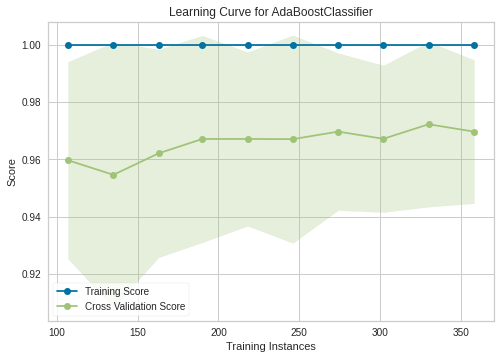

In [ ]:
plot_model(estimator = tuned_ada, plot = 'learning')

***AUC Curve***

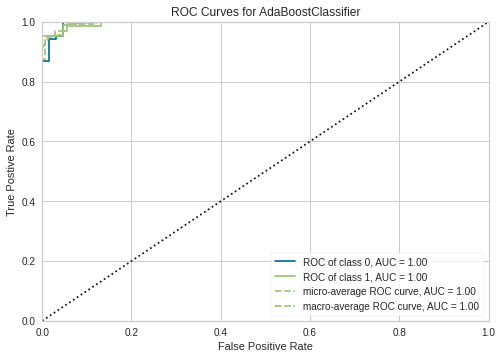

In [ ]:
plot_model(estimator = tuned_ada, plot = 'auc')

***Confusion Matrix***

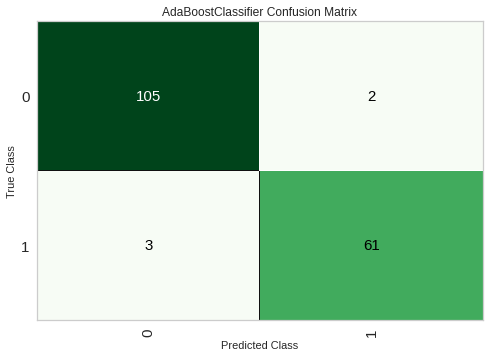

In [ ]:
plot_model(estimator = tuned_ada, plot = 'confusion_matrix')

***Feature Importance***

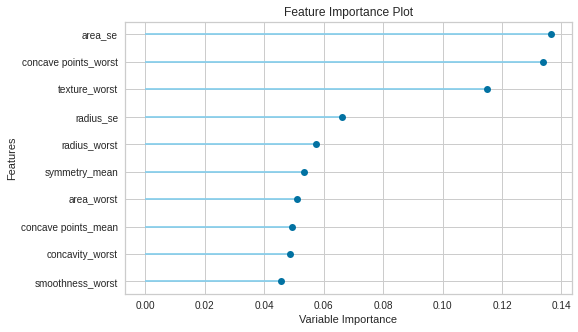

In [ ]:
plot_model(estimator = tuned_ada, plot = 'feature')

In [ ]:
evaluate_model(tuned_ada)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…